선형회귀
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC3/blob/main/gg-29-선형회귀.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC3/blob/main/gg-29-선형회귀.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

- y = 2x+3

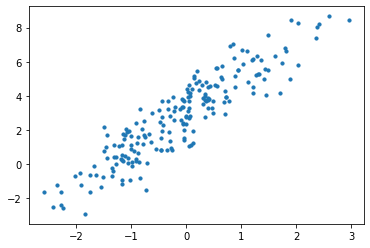

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)
plt.scatter(x,y, s=10)

### Numpy 제공 상관계수 함수
- np.corrcoef()

In [ ]:
np.corrcoef(x,y)

array([[1.        , 0.89625383],
       [0.89625383, 1.        ]])

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[2.08425648]
3.0462802651803402


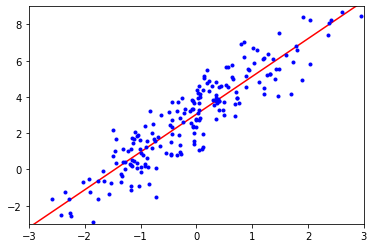

In [ ]:
X_b = np.c_[np.ones((200, 1)), x] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[-3], [3]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([-3, 3, -3, 9])
plt.show()

### 경사하강법

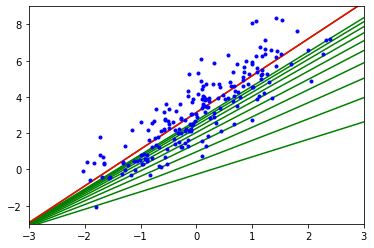

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)

X_b = np.c_[np.ones((200, 1)), x] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[-3], [3]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

eta = 0.1 # learning rate
n_iterations = 500
m = 200
theta = np.random.randn(2, 1)
y_predict_gd = 0
for iteration in range(n_iterations):
    gradients = 2. / m * X_b.T.dot(X_b.dot(theta) - np.c_[y])
    theta = theta - eta * gradients
    y_predict_gd = X_new_b.dot(theta)
    if iteration < 10:
        plt.plot(X_new, y_predict_gd, "g-")
plt.plot(X_new, y_predict_gd, "g-")
plt.plot(X_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([-3, 3, -3, 9])
plt.show()

변수가 2개인 경우
--
- y = 2*x1 + 3*x2 + 4 + noise 

In [ ]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[2.03131312 2.99446603]
3.936464992950946


In [ ]:
leg.score(X,y)

0.9198679421544347

경사하강법
--
- d(y_pred - y)^2 / dw1 = 2* (y_pred - y) * x1

In [ ]:
num_epoch = 10
lr = 0.7

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.536340,  w2 = 0.284110, b = 0.257127 , error = 4.344364
 1 w1 = 1.580242,  w2 = 2.515518, b = 3.042704 , error = 1.274032
 2 w1 = 1.938148,  w2 = 2.904856, b = 3.758891 , error = 0.796381
 3 w1 = 2.043616,  w2 = 2.971283, b = 3.950694 , error = 0.750607
 4 w1 = 2.072335,  w2 = 2.981689, b = 4.003745 , error = 0.749140
 5 w1 = 2.079731,  w2 = 2.982880, b = 4.018803 , error = 0.749172
 6 w1 = 2.081538,  w2 = 2.982809, b = 4.023171 , error = 0.749255
 7 w1 = 2.081951,  w2 = 2.982683, b = 4.024462 , error = 0.749286
 8 w1 = 2.082036,  w2 = 2.982617, b = 4.024850 , error = 0.749297
 9 w1 = 2.082050,  w2 = 2.982590, b = 4.024969 , error = 0.749301


In [ ]:
leg.score(X,y)

0.9362569732828883